In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(cv.__version__)

4.1.1


In [3]:
src = cv.imread(cv.samples.findFile('shape_2.jpg'))

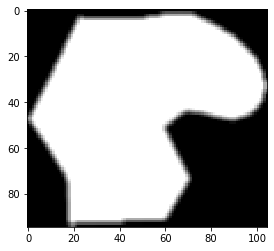

In [4]:
gray_image = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
template = np.copy(gray_image)
template[gray_image < 100]=0
template[gray_image >= 100]= 255
template = cv.blur(cv.resize(template,(int(template.shape[1]/3),int(template.shape[0]/3))),(3,3))
plt.imshow(template,cmap='gray')
template_e = cv.Canny(template,100,250)

In [5]:
def draw_angled_rec(x0, y0, width, height, angle, img):

    _angle = angle * np.pi / 180.0
    b = np.cos(_angle) * 0.5
    a = np.sin(_angle) * 0.5
    pt0 = (int(x0 - a * height - b * width),
           int(y0 + b * height - a * width))
    pt1 = (int(x0 + a * height - b * width),
           int(y0 - b * height - a * width))
    pt2 = (int(2 * x0 - pt0[0]), int(2 * y0 - pt0[1]))
    pt3 = (int(2 * x0 - pt1[0]), int(2 * y0 - pt1[1]))

    cv.line(img, pt0, pt1, (255, 255, 255), 3)
    cv.line(img, pt1, pt2, (255, 255, 255), 3)
    cv.line(img, pt2, pt3, (255, 255, 255), 3)
    cv.line(img, pt3, pt0, (255, 255, 255), 3)

In [6]:
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(template)
#Guli
alg.setMinScale(0.8)
alg.setMaxScale(1.2)
alg.setPosThresh(25)
alg.setAngleStep(1)
alg.setAngleEpsilon(5)
alg.setScaleStep(0.1)
alg.setScaleThresh(2700)
alg.setCannyLowThresh(230)
alg.setCannyHighThresh(250)
alg.setAngleThresh(2280)

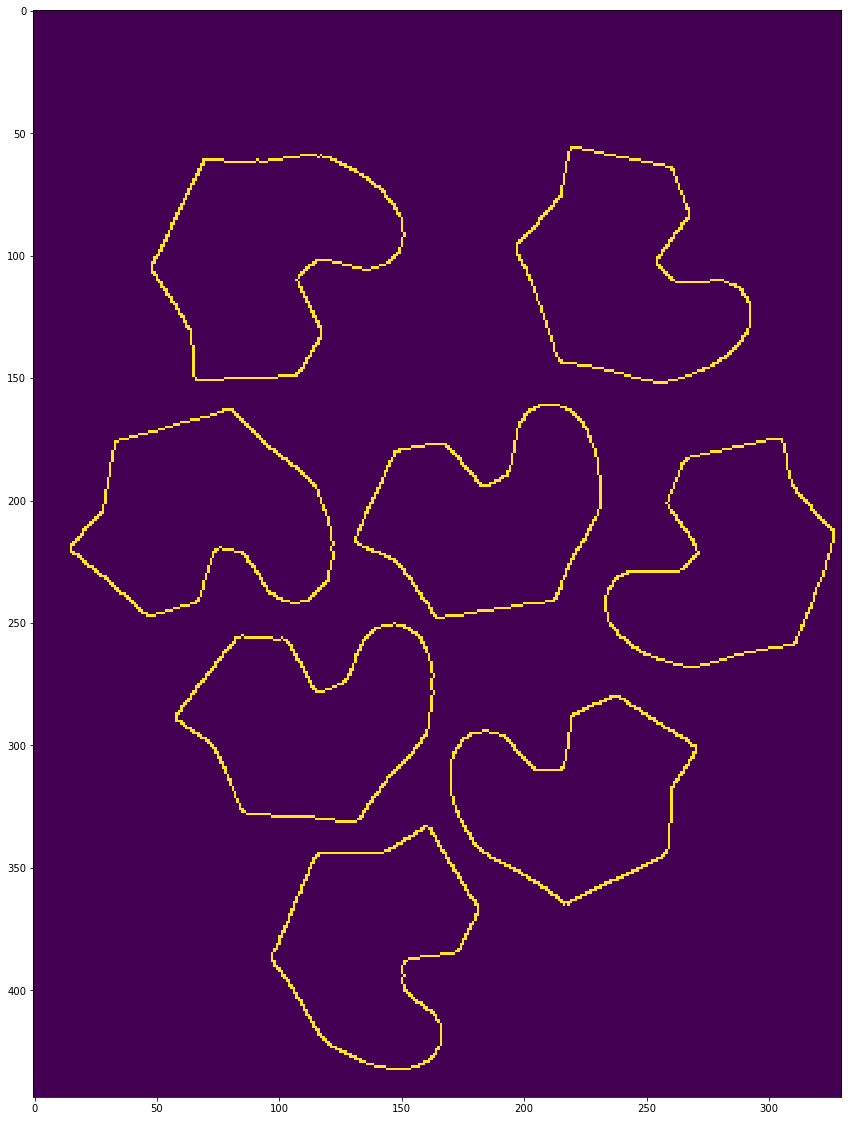

In [7]:
img_src = cv.imread('img_2.jpg')
img_src = cv.resize(img_src,(int(img_src.shape[1]/3),int(img_src.shape[0]/3)))
plt.show()
src_1 = cv.blur(cv.cvtColor(img_src,cv.COLOR_BGR2GRAY),(3,3))
edges_1 = cv.Canny(src_1,200,250)
fig,ax = plt.subplots(figsize=(20,20))
ax.imshow(edges_1)

In [8]:
(x,y) = alg.detect(src_1)
print(x)
print(y)

[[[ 69.  207.    0.9  44. ]
  [220.  318.    0.9 215. ]
  [ 98.   99.    0.9 359. ]
  [ 99.  104.    1.  359. ]
  [100.  105.    1.  359. ]
  [188.  204.    1.  359. ]]]
[[[  48 3126 2284]
  [  51 2725 4186]
  [  38 3084 2455]
  [  31 3588 2455]
  [  43 3588 2455]
  [  29 3588 2455]]]


In [9]:
x.shape

(1, 6, 4)

In [10]:
x=x[0]
for v in x:
    b = int(template.shape[0] * v[2])
    a = int(template.shape[1] * v[2])
    draw_angled_rec(v[0],v[1],a,b,v[3],edges_1)

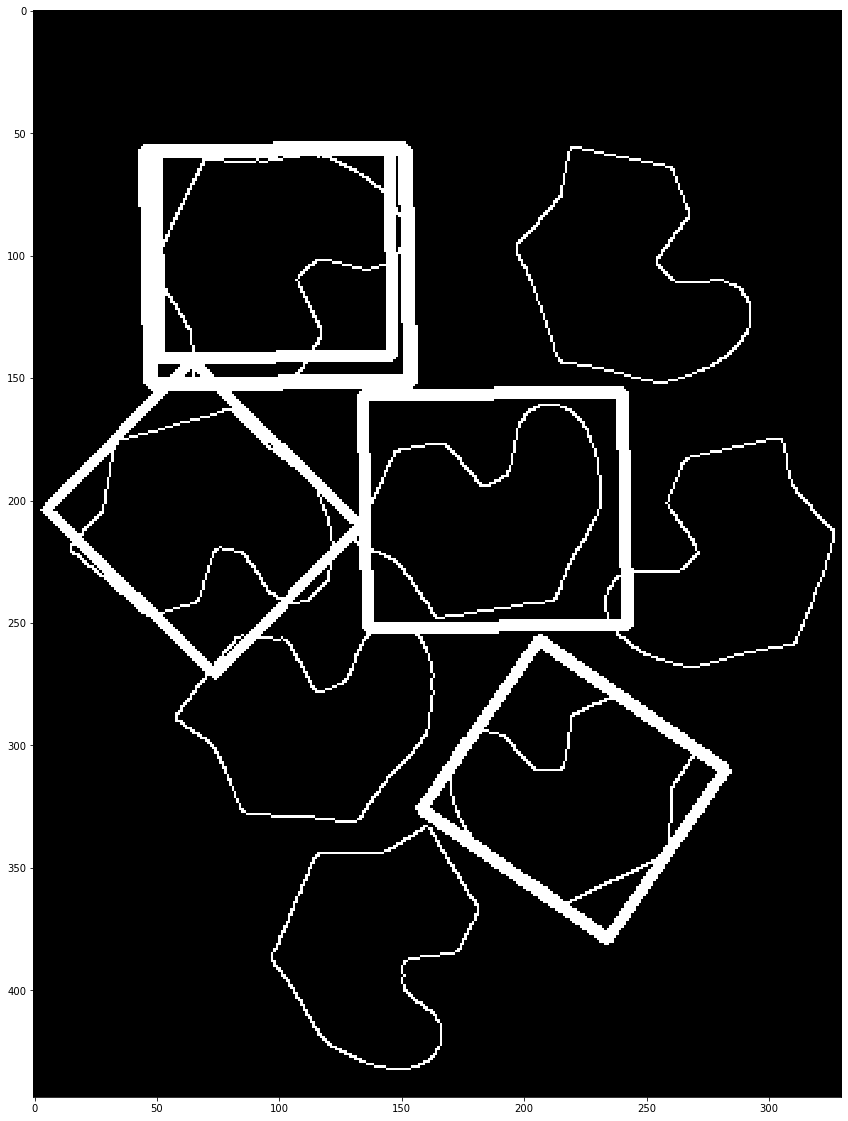

In [11]:
fig,ax = plt.subplots(figsize=(20,20))
ax.imshow(edges_1,cmap='gray')
plt.show()

* Uchwycenie wyszyskich kształków jest bardzo trudne
* Możemy zauważyć ze jeden kształt zostaje wykryty wiele razy
* Najtrudniej jest wykryć dobrą skalę obiektu

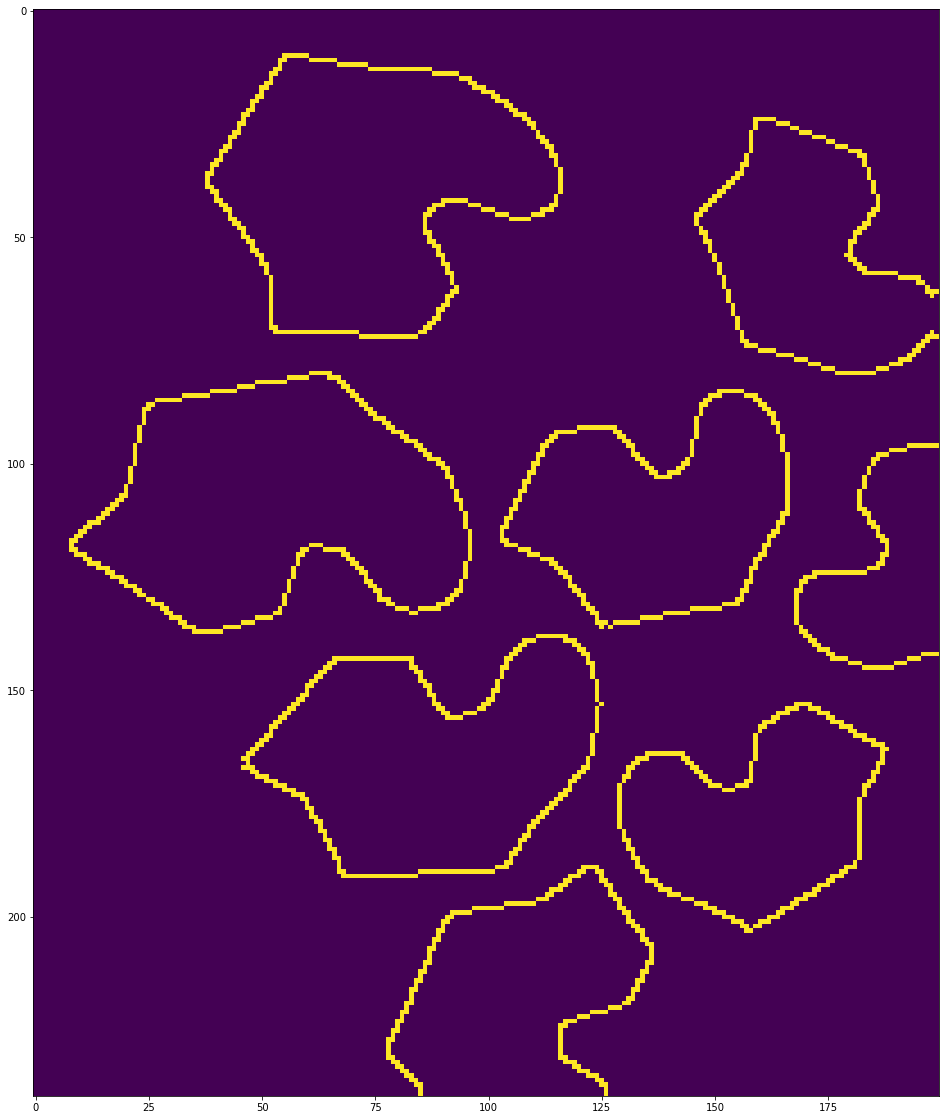

In [12]:
img_src_2 = cv.imread('img_3.jpg')
img_src_2 = cv.resize(img_src_2,(int(img_src_2.shape[1]/2),int(img_src_2.shape[0]/2)))
plt.show()
src_2 = cv.blur(cv.cvtColor(img_src_2,cv.COLOR_BGR2GRAY),(3,3))
edges_2 = cv.Canny(src_2,200,250)
fig,ax = plt.subplots(figsize=(20,20))
ax.imshow(edges_2)

Wprowadzona modyfikacja to przekrzywienie zdjęcia tak aby przypominało zrobione `z boku`

In [13]:
(x,y) = alg.detect(src_2)
print(x)
print(y)

None
None


Przy ustawieniach z nieprzekształconego obrazy transformata nie jest w stanie wykryć rzadnego kształtu

In [14]:
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(template)
#Guli
alg.setMinScale(0.8)
alg.setMaxScale(1.2)
alg.setPosThresh(20)
alg.setAngleStep(1)
alg.setAngleEpsilon(5)
alg.setScaleStep(0.1)
alg.setScaleThresh(300)
alg.setCannyLowThresh(230)
alg.setCannyHighThresh(250)
alg.setAngleThresh(1200)

In [15]:
(x,y) = alg.detect(src_2)
print(x)
print(y)

[[[ 75.   49.    0.8   6. ]
  [ 75.   55.    0.9   6. ]
  [140.  194.    1.1  28. ]
  [ 34.   77.    1.1 216. ]
  [151.  142.    1.1 269. ]]]
[[[  38  496 1213]
  [  36  785 1213]
  [  22  989 1815]
  [  23  344 1531]
  [  21  766 1808]]]


In [16]:
x=x[0]
for v in x:
    b = int(template.shape[0] * v[2] * (edges_2.shape[0]/edges_1.shape[0]))
    a = int(template.shape[1] * v[2] * (edges_2.shape[1]/edges_1.shape[1]))
    draw_angled_rec(v[0],v[1],a,b,v[3],edges_2)

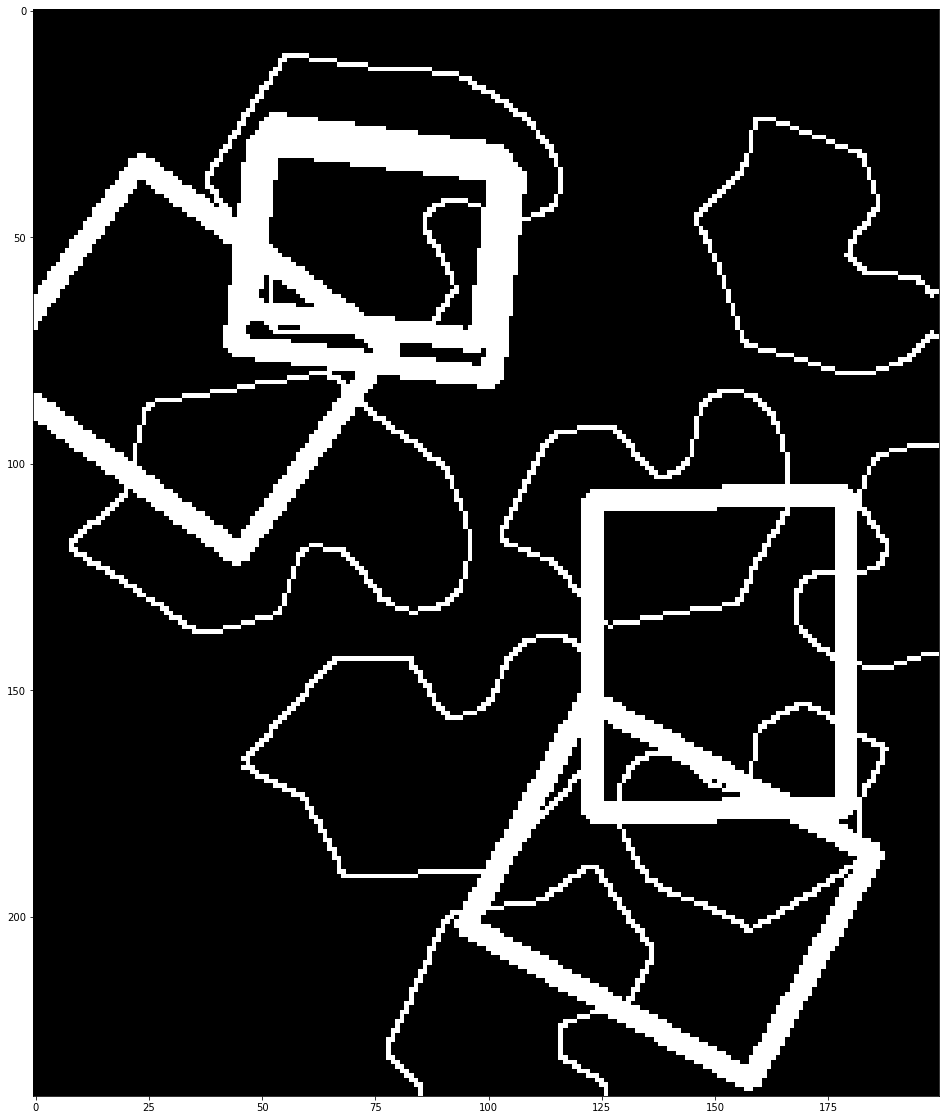

In [17]:
fig,ax = plt.subplots(figsize=(20,20))
ax.imshow(edges_2,cmap='gray')
plt.show()

Po poprawienu parametrów udało się wykryć kilka obiektów ale nie udało się ich wykryć dokładnie